Importerar datafilen och lägger till separator för kolumnerna ';'.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\trysb\OneDrive\Dokument\BI-analyst med AI-kompetens\ML och AI\Inlämningsuppgifter\Gruppuppgift, 1\car_price_dataset.csv", sep=';')


Utforskar datasetet för att få en överblick.

In [3]:
print (df.shape)
print (df.info())
print (df.head())

(10000, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB
None
        Brand   Model  Year  Engine_Size Fuel_Type    Transmission  Mileage  \
0         Kia     Rio  2020          4.2    Diesel          Manual   289944   
1   Chevrolet  Malibu  2012          2.0    Hybrid       Automatic     5356   
2    Mercedes     GLA  2020          4.2    Diesel       A

Delar in i X och Y, där Y (som är målvariabeln) är Price, och X är alla övriga kolumner.

In [4]:
X = df.drop("Price", axis=1)
y = df["Price"]


Kontrollera att uppdelning blev korrekt.

In [5]:
y.head()
X.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3


Fortsätter med EDA för att se hur olika x-variabler påverkar vår y-variabel genom att visa som olika diagram.  

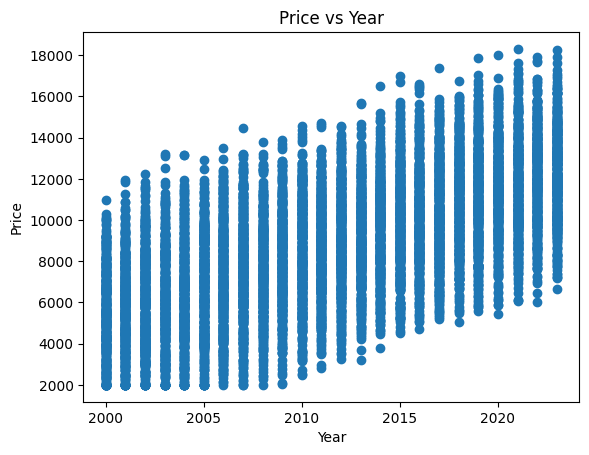

In [6]:
# Pris vs År
plt.scatter(X["Year"], y)
plt.xlabel("Year")
plt.ylabel("Price")
plt.title("Price vs Year")
plt.show()

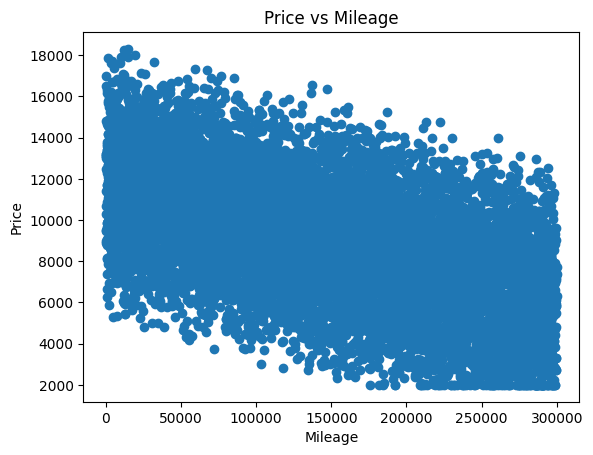

In [7]:
# Pris vs Mileage
plt.scatter(X["Mileage"], y)
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.title("Price vs Mileage")
plt.show()

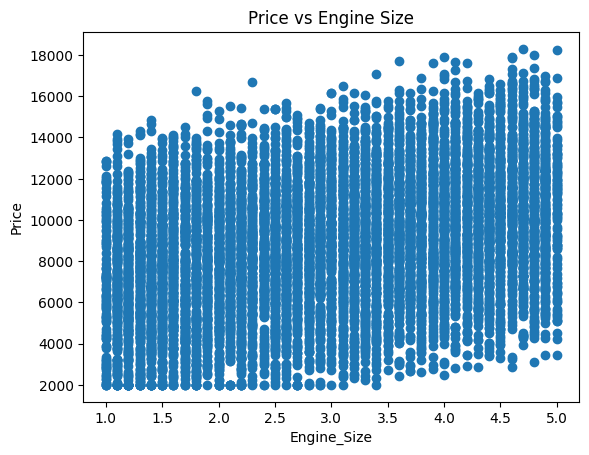

In [8]:
# Pris vs Engine_Size
plt.scatter(X["Engine_Size"], y)
plt.xlabel("Engine_Size")
plt.ylabel("Price")
plt.title("Price vs Engine Size")
plt.show()

Då year och milage verkar vara relaterade går jag vidare och undersöker dess korrelation.

In [9]:
X["Year"].corr(X["Mileage"])

np.float64(-0.0024759259762961905)

Värdet (-0.0025) innebär nästan ingen linjär korrelation alls mellan Year och Mileage. ariablerna innehåller därför olika information och är bra att inkludera i modellen.

Nästa steg är att undersöka hur många olika modeller och märken som finns för att kontrollera att det inte finns tusentals vilket kan göra det svårt hitta samband i modellen.

In [10]:
print (X["Brand"].nunique())
print (X["Model"].nunique())

10
30


In [11]:
# Undersöker antal per modell för att se om många endast har få köp, vilket skulle försvåra det för modellen
X["Model"].value_counts(ascending=True)

Model
C-Class     306
CR-V        308
X5          311
Sportage    313
Equinox     315
GLA         315
Sonata      319
Camry       321
E-Class     321
RAV4        324
Corolla     325
Rio         327
Tucson      329
Passat      329
Malibu      333
Explorer    334
3 Series    335
Optima      336
Civic       336
A3          338
Golf        339
Elantra     347
Q5          350
A4          350
Focus       351
Tiguan      352
5 Series    353
Impala      355
Fiesta      363
Accord      365
Name: count, dtype: int64

In [12]:
# Undersöker om det finns några null-värden (även om jag såg det redan i min första överblick med .info)
print(df.isnull().sum())

Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64


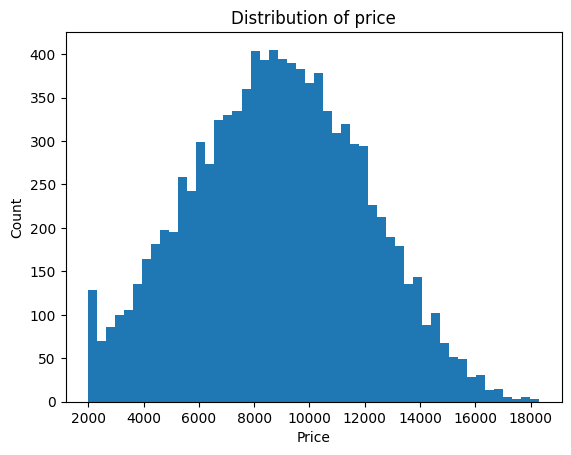

In [19]:
# Histogram för att se spridning av pris
plt.hist(y, bins=50)
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("Distribution of price")
plt.show()

In [ ]:
# Formel för att räkna ut antal outliers , då boxplot inte tydligt visade antal
Q1 = y.quantile(0.25)
Q3 = y.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = y[(y < lower_bound) | (y > upper_bound)]

print("Antal outliers:", len(outliers))
print("Andel outliers (%):", len(outliers) / len(y) * 100)

Antal outliers: 6
Andel outliers (%): 0.06


Jag väljer att köra cross validation för att utvärdera vilken modell som är bäst, eftersom datasetet är tillräckligt litet för att kunna använda cross validation utan att det tar för lång tid. Cross validation ger ett mer stabilt och tillförlitligt RMSE-värde, vilket gör det lättare att jämföra olika modeller och välja den som passar bäst för uppgiften.

Jag sparar 20 % av datan som testdata, medan resterande 80 % används för träning och validering genom cross validation.

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split (
    X, y, test_size=0.2, random_state=42 
)

Eftersom att många kolumner innehåller text, och ML-modeller inte kan hantera text, så är nästa steg att omvandla dessa till numeriska kolumner med encoding. 

In [ ]:
# Skapar en lista med alla kolumner som är kategoriska (text) och måste kodas om till siffror
categorical_cols = ["Brand", "Model", "Fuel_Type", "Transmission"]

# Skapar en lista med alla kolumner som är numeriska och som ska skalas om
numeric_cols = ["Year", "Mileage", "Engine_Size", "Doors", "Owner_Count"]

# Importerar verktyg för att kunna behandla olika kolumner på olika sätt
from sklearn.compose import ColumnTransformer # för att hantera all omvandling i samma process
from sklearn.preprocessing import OneHotEncoder, StandardScaler # för att göra text->siffror och skala om numeriska kolumner
from sklearn.pipeline import Pipeline # för att kunna köra flera steg i följd
from sklearn.impute import SimpleImputer # för hantering av null-värden

# Pipeline för kategoriska kolumner:
# - fyller NaN med vanligaste värdet
# - kodar om text till dummyvariabler
cat_pipeline = Pipeline (steps= [
    ("imputer", SimpleImputer (strategy="most_frequent")),
    ("encoder", OneHotEncoder (sparse_output=False, handle_unknown="ignore", drop="first"))
]) 
# Pipeline för numeriska kolumner:
# - fyller NaN med median (robust mot outliers)
# - skalar värdena med StandardScaler
num_pipeline = Pipeline (steps= [
    ("imputer", SimpleImputer (strategy="median")),
    ("scaler", StandardScaler ())
])

# Skapar en process för att omvandla text till siffror, skalar siffror och låter ev övriga kolumner vara (remainder="passthrough")
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", cat_pipeline, categorical_cols),
        ("num", num_pipeline, numeric_cols)
    ],
    remainder="passthrough"
)

In [15]:
# Använder ovan skapad process för att faktiskt transformera data in till modellen
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

In [16]:
# Kontrollerar typ på X_train för att se att det transformerades korrekt
type(X_train_encoded)

numpy.ndarray

Nu är jag nöjd med EDA och går vidare till att skapa en modell av befintliga kolumner/data. Min första modell att testa är Lasso regression.